In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\Pranav\Downloads\archive (4).zip")  # Update with the correct path if needed

# Ensure 'Survived' is binary (0 = No, 1 = Yes)
df['Survived'] = df['Survived'].astype(int)

### 1. Max survival by Cabin
cabin_survival = df.groupby('Cabin')['Survived'].sum().sort_values(ascending=False)
max_cabin = cabin_survival.idxmax()
print(f"🚢 Cabin with maximum survival: {max_cabin} ({cabin_survival[max_cabin]} survivors)")

### 2. Max survival by Age Group
# Define age bins
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

agegroup_survival = df.groupby('AgeGroup')['Survived'].sum().sort_values(ascending=False)
max_agegroup = agegroup_survival.idxmax()
print(f"👶 Age group with maximum survival: {max_agegroup} ({agegroup_survival[max_agegroup]} survivors)")

### 3. Max survival by Pclass
pclass_survival = df.groupby('Pclass')['Survived'].sum().sort_values(ascending=False)
max_pclass = pclass_survival.idxmax()
print(f"🏷️ Pclass with maximum survival: {max_pclass} ({pclass_survival[max_pclass]} survivors)")

### 4. Max survival by Embarked
embarked_survival = df.groupby('Embarked')['Survived'].sum().sort_values(ascending=False)
max_embarked = embarked_survival.idxmax()
print(f"⚓ Port with maximum survival: {max_embarked} ({embarked_survival[max_embarked]} survivors)")


🚢 Cabin with maximum survival: B96 B98 (4 survivors)
👶 Age group with maximum survival: Young Adult (137 survivors)
🏷️ Pclass with maximum survival: 1 (136 survivors)
⚓ Port with maximum survival: S (217 survivors)


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Pranav\Downloads\archive (4).zip")  # Update with the correct path if needed


# Ensure 'Survived' is binary (0 = Died, 1 = Survived)
df['Survived'] = df['Survived'].astype(int)

# Create Age Groups
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Create a column for death
df['Died'] = 1 - df['Survived']

# 1. Maximum deaths by Cabin
cabin_deaths = df.groupby('Cabin')['Died'].sum().sort_values(ascending=False)
max_cabin_death = cabin_deaths.idxmax()
print(f"💀 Cabin with most deaths: {max_cabin_death} ({cabin_deaths[max_cabin_death]} deaths)")

# 2. Maximum deaths by Age Group
agegroup_deaths = df.groupby('AgeGroup')['Died'].sum().sort_values(ascending=False)
max_agegroup_death = agegroup_deaths.idxmax()
print(f"👶 Age group with most deaths: {max_agegroup_death} ({agegroup_deaths[max_agegroup_death]} deaths)")

# 3. Maximum deaths by Pclass
pclass_deaths = df.groupby('Pclass')['Died'].sum().sort_values(ascending=False)
max_pclass_death = pclass_deaths.idxmax()
print(f"🏷️ Pclass with most deaths: {max_pclass_death} ({pclass_deaths[max_pclass_death]} deaths)")

# 4. Maximum deaths by Embarked
embarked_deaths = df.groupby('Embarked')['Died'].sum().sort_values(ascending=False)
max_embarked_death = embarked_deaths.idxmax()
print(f"⚓ Port with most deaths: {max_embarked_death} ({embarked_deaths[max_embarked_death]} deaths)")


💀 Cabin with most deaths: C23 C25 C27 (2 deaths)
👶 Age group with most deaths: Young Adult (221 deaths)
🏷️ Pclass with most deaths: 3 (372 deaths)
⚓ Port with most deaths: S (427 deaths)


In [4]:

# Create AgeGroup bins
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Drop rows with missing values in any of the important columns
df_filtered = df[['Cabin', 'AgeGroup', 'Pclass', 'Embarked', 'Survived']].dropna()

# Group by Cabin, AgeGroup, Pclass, Embarked
grouped = df_filtered.groupby(['Cabin', 'AgeGroup', 'Pclass', 'Embarked'])

# Compute survival statistics
summary = grouped['Survived'].agg(['count', 'sum']).rename(columns={'count': 'Total', 'sum': 'Survived'})

# Add survival rate and death rate
summary['SurvivalRate'] = summary['Survived'] / summary['Total']
summary['DeathRate'] = 1 - summary['SurvivalRate']

# Reset index to view all columns
summary = summary.reset_index()

# Filter for maximum survival rate
max_survival = summary.sort_values(by='SurvivalRate', ascending=False).iloc[0]
print("✅ Combination with Highest Survival Rate:")
print(max_survival)

# Filter for maximum death rate
max_death = summary.sort_values(by='DeathRate', ascending=False).iloc[0]
print("\n💀 Combination with Highest Death Rate:")
print(max_death)


✅ Combination with Highest Survival Rate:
Cabin             E40
AgeGroup        Adult
Pclass              1
Embarked            C
Total               1
Survived            1
SurvivalRate      1.0
DeathRate         0.0
Name: 5202, dtype: object

💀 Combination with Highest Death Rate:
Cabin             A10
AgeGroup        Adult
Pclass              1
Embarked            C
Total               1
Survived            0
SurvivalRate      0.0
DeathRate         1.0
Name: 27, dtype: object


📊 Correlation of Survived with other features:

             Survived
Survived     1.000000
Sex          0.543351
Cabin        0.270310
Fare         0.257307
Embarked     0.106811
Parch        0.081629
PassengerId -0.005007
SibSp       -0.035322
Age         -0.064910
Pclass      -0.338481
Died        -1.000000


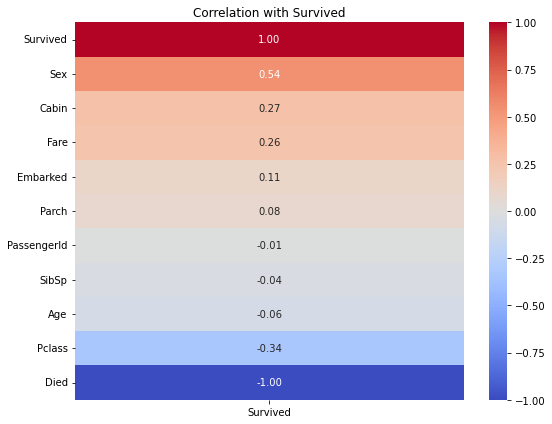

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Optional: Encode categorical features to numeric
df_encoded = df.copy()

# Encode Sex, Embarked, and Cabin (simplified Cabin to first letter to reduce cardinality)
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_encoded['Cabin'] = df_encoded['Cabin'].astype(str).str[0]
df_encoded['Cabin'] = df_encoded['Cabin'].map({c: i for i, c in enumerate(df_encoded['Cabin'].unique())})

# Fill missing values
df_encoded['Age'] = df_encoded['Age'].fillna(df_encoded['Age'].median())
df_encoded['Fare'] = df_encoded['Fare'].fillna(df_encoded['Fare'].median())
df_encoded['Embarked'] = df_encoded['Embarked'].fillna(df_encoded['Embarked'].mode()[0])
df_encoded['Cabin'] = df_encoded['Cabin'].fillna(-1)

# Select only numeric columns
numeric_cols = df_encoded.select_dtypes(include='number')

# Compute correlation with 'Survived'
correlation_matrix = numeric_cols.corr()

# Extract correlation of all features with 'Survived'
survived_corr = correlation_matrix[['Survived']].sort_values(by='Survived', ascending=False)

print("📊 Correlation of Survived with other features:\n")
print(survived_corr)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(survived_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation with Survived")
plt.tight_layout()
plt.show()


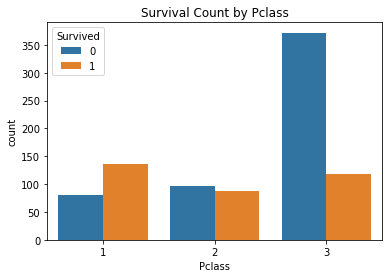

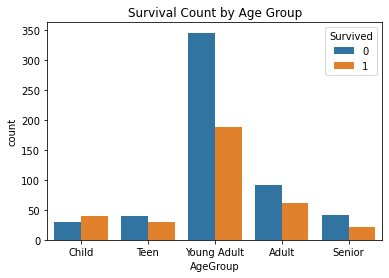

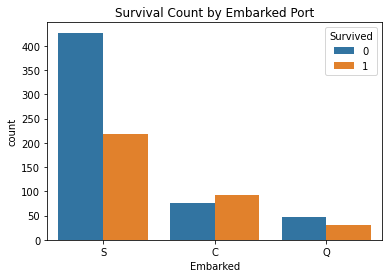

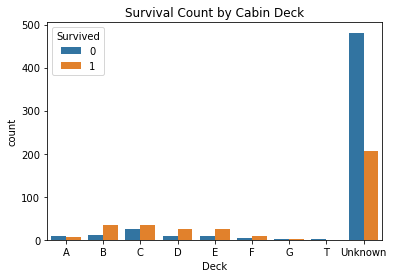

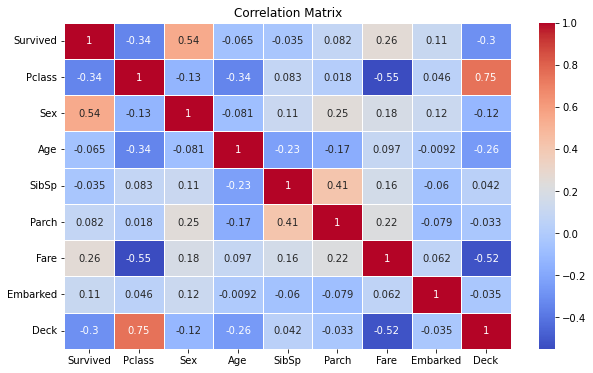

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Fill missing values for consistent analysis
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Create Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 80], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Extract Deck from Cabin
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'Unknown')

# ------------------- PLOTS -----------------------

# Plot 1: Survival by Pclass
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Pclass')
plt.show()

# Plot 2: Survival by AgeGroup
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='AgeGroup', hue='Survived')
plt.title('Survival Count by Age Group')
plt.show()

# Plot 3: Survival by Embarked
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarked Port')
plt.show()

# Plot 4: Survival by Cabin Deck
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Deck', hue='Survived', order=sorted(df['Deck'].unique()))
plt.title('Survival Count by Cabin Deck')
plt.show()

# ------------------ CORRELATION MATRIX -----------------------

# Encode categorical variables for correlation
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_encoded['AgeGroup'] = df_encoded['AgeGroup'].map({'Child': 0, 'Teen': 1, 'Young Adult': 2, 'Adult': 3, 'Senior': 4})
df_encoded['Deck'] = df_encoded['Deck'].astype('category').cat.codes

# Select relevant features
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeGroup', 'Deck']

# Compute correlation matrix
corr = df_encoded[features].corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


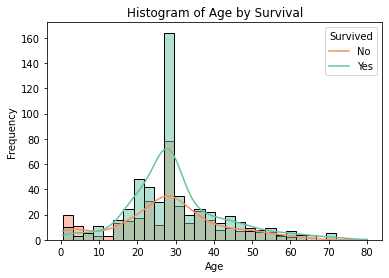

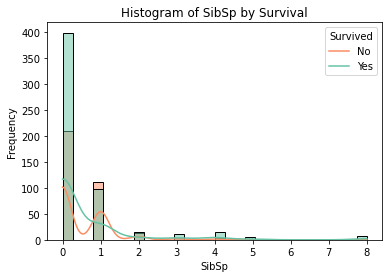

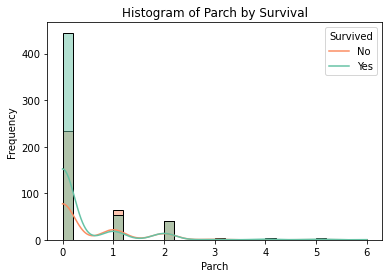

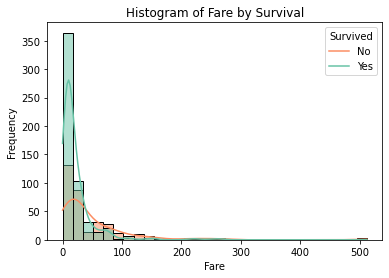

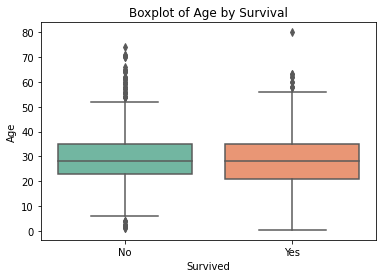

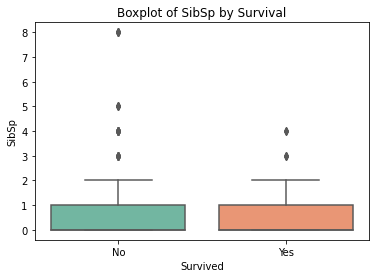

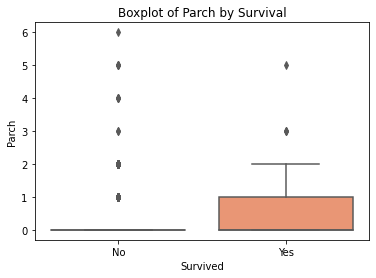

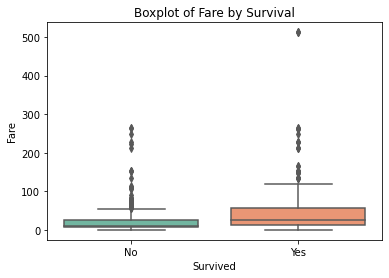

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Fill missing values for numeric columns (important before plotting)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# List of numeric features
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# ---------------- Histogram with hue='Survived' ----------------
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Survived', bins=30, kde=True, palette='Set2')
    plt.title(f'Histogram of {col} by Survival')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.show()

# ---------------- Boxplot with hue='Survived' ----------------
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Survived', y=col, palette='Set2')
    plt.title(f'Boxplot of {col} by Survival')
    plt.xlabel('Survived')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()
